In [0]:
from fastai import *
from fastai.vision import *

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!unzip '/content/gdrive/My Drive/widsdatathon/widsdatathon2019'
!unzip '/content/train_images'
!unzip '/content/leaderboard_test_data'
!unzip '/content/leaderboard_holdout_data'

Archive:  /content/gdrive/My Drive/widsdatathon/widsdatathon2019.zip
  inflating: train_images.zip        
  inflating: traininglabels.csv      
  inflating: SampleSubmission.csv    
  inflating: leaderboard_holdout_data.zip  
  inflating: leaderboard_test_data.zip  
Archive:  /content/train_images.zip
   creating: train_images/
  inflating: train_images/img_068062017.jpg  
  inflating: train_images/img_013962018.jpg  
  inflating: train_images/img_029652018.jpg  
  inflating: train_images/img_018402017.jpg  
  inflating: train_images/img_090232018.jpg  
  inflating: train_images/img_111972018.jpg  
  inflating: train_images/img_087662017.jpg  
  inflating: train_images/img_085292018.jpg  
  inflating: train_images/img_046872017.jpg  
  inflating: train_images/img_084512018.jpg  
  inflating: train_images/img_021842018.jpg  
  inflating: train_images/img_018502017.jpg  
  inflating: train_images/img_087762017.jpg  
  inflating: train_images/img_111872018.jpg  
  inflating: train_images

In [0]:
path = Path('/content')
train = 'train_images'
test =  path/'leaderboard_test_data'
holdout = path/'leaderboard_holdout_data'
sample = path/'SampleSubmission.csv'
labels = path/'traininglabels.csv'


In [0]:
labels_df = pd.read_csv(labels)
labels_df.head()

,image_id,has_oilpalm,score
0,img_000002017.jpg,0,0.7895
1,img_000012017.jpg,0,1.0000
2,img_000022017.jpg,0,1.0000
3,img_000072017.jpg,0,1.0000
4,img_000082017.jpg,0,1.0000


In [0]:
sample_df = pd.read_csv(sample)
sample_df.head()

,image_id,has_oilpalm
0,img_000012018.jpg,1
1,img_000022018.jpg,1
2,img_000032017.jpg,1
3,img_000042017.jpg,1
4,img_000052017.jpg,1


In [0]:
len(labels_df['score'].unique())

836

In [0]:
len(labels_df[labels_df['has_oilpalm']==1])

942

In [0]:
len(labels_df[labels_df['has_oilpalm']==0])

14302

In [0]:
tfms = get_transforms(do_flip:bool=True, flip_vert:bool=False, max_rotate:float=20.0)

In [0]:
test_names = [f for f in test.iterdir()]
holdout_names = [f for f in holdout.iterdir()]

In [0]:
src = (ImageItemList.from_df(labels_df, path, folder=train)
      .random_split_by_pct(0.2, seed=333)
      .label_from_df('has_oilpalm')
      .add_test(test_names+holdout_names))

In [0]:
data =  (src.transform(tfms, size=128)
         .databunch(bs=64)
         .normalize(imagenet_stats))

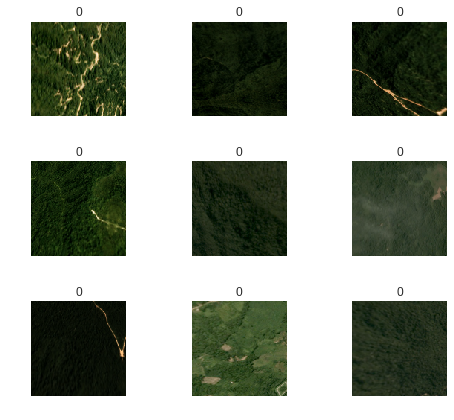

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
len(labels_df[labels_df['has_oilpalm']==0])

14302

In [0]:
from sklearn.metrics import roc_auc_score
def auc_score(preds,targets): 
    return torch.tensor(roc_auc_score(targets,preds[:,1]))

In [0]:
learn = create_cnn(data, models.densenet151, metrics=[accuracy, auc_score], opt_func=optim.Adam)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 98894406.89it/s]


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-03


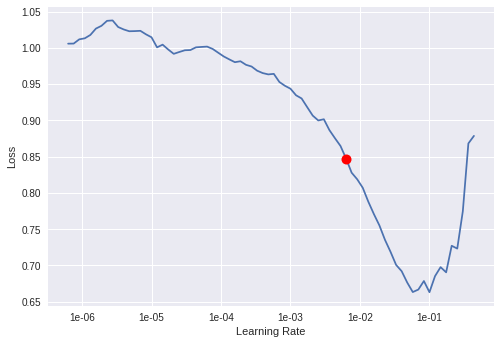

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,auc_score
1,0.085687,0.053465,0.986220,0.968833
2,0.066926,0.041457,0.987205,0.988853
3,0.050573,0.033041,0.989829,0.990891
4,0.044232,0.030990,0.989829,0.996865
5,0.030171,0.029774,0.989829,0.997118


In [0]:
learn.save('128_freezed_1')

In [0]:
learn.load('128_freezed_1')

Learner(data=ImageDataBunch;

Train: LabelList (12196 items)
x: ImageItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
0,0,0,0,0
Path: /content;

Valid: LabelList (3048 items)
x: ImageItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
0,0,0,0,0
Path: /content;

Test: LabelList (6534 items)
x: ImageItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: /content, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_si

In [0]:
learn.unfreeze()


In [0]:
learn.fit_one_cycle(5, slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy,auc_score
1,0.025831,0.031480,0.989501,0.996891
2,0.044835,0.033501,0.988517,0.997835
3,0.031997,0.026875,0.990486,0.997937
4,0.023597,0.026745,0.989829,0.997800
5,0.022239,0.027709,0.989829,0.997658


In [0]:
learn.save('128_unfreezed_1')

In [0]:
p,t = learn.get_preds(ds_type=DatasetType.Test)
p = to_np(p)
ids = np.array([f.name for f in (test_names+holdout_names)])
sub = pd.DataFrame(np.stack([ids, p[:,1]], axis=1), columns=sample_df.columns)
sub.to_csv('res50_rotate.csv', index=False)